# ML using Python - Market Basket Analysis 


Priyaranjan Mohanty

A useful (but somewhat overlooked) Machine Learning unspuervised technique is called <b>Association Analysis or Affinity Analysis or Association Rule Mining </b> which attempts to find common patterns of items in large data sets. 

One specific application is often called <b>market basket analysis </b>.

The most commonly cited example of market basket analysis is the so-called “beer and diapers” case. The basic story is that a large retailer was able to mine their transaction data and find an unexpected purchase pattern of individuals that were buying beer and baby diapers at the same time.

Unfortunately this story is most likely a data urban legend. However, it is an illustrative (and entertaining) example of the types of insights that can be gained by mining transactional data.

## What is a Market Basket Analysis?


Market basket analysis scrutinizes the products customers tend to buy together, and uses the information to decide which products should be cross-sold or promoted together. The term arises from the shopping carts supermarket shoppers fill up during a shopping trip.

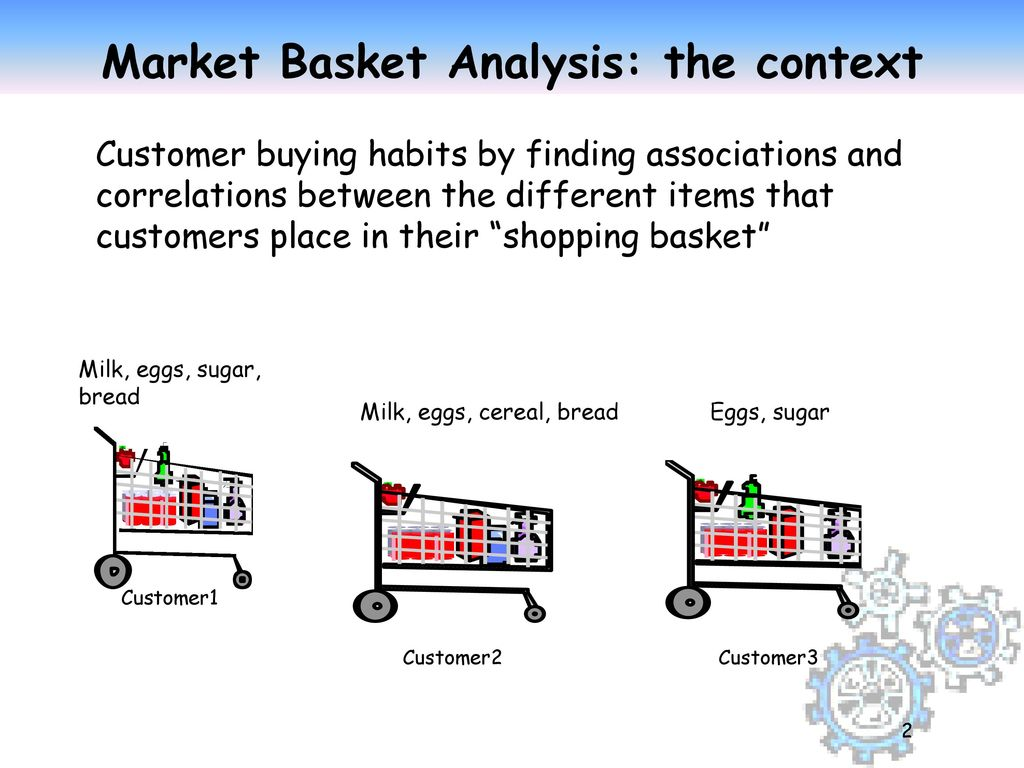

Normally MBA is done on transaction data from the point of sales system on a customer level. 

We can use MBA to extract interesting association between products from the data. 

Hence its output consists of a series of product association rules: for example, if customers buy product A they also tend to buy product B. 

In this discussion , We will follow the three most popular criteria evaluating the quality or the strength of an association rule 

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

<b><u>Measure 1: Support.</u></b> This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In Table 1 below, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.

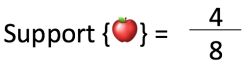



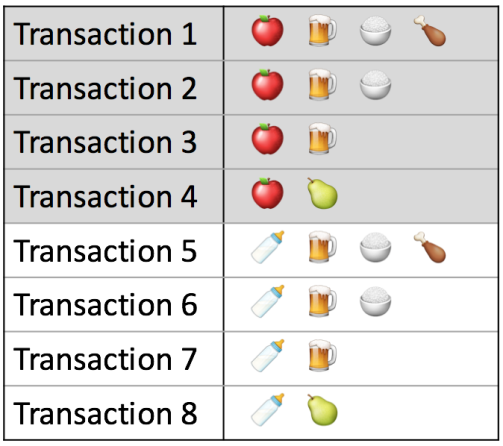

If we discover that sales of items beyond a certain proportion tend to have a significant impact on our profits, we might consider using that proportion as our support threshold. 

We may then identify itemsets with support values above this threshold as significant itemsets.

<b><u>Measure 2: Confidence.</b></u> This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.

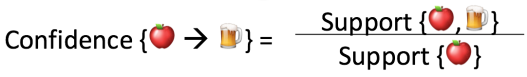


The higher the confidence, the greater the likelihood that the item on the right hand side will be purchased

One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. To account for the base popularity of both constituent items, we use a third measure called lift.

<b><u>Measure 3: Lift.</b></u> This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.

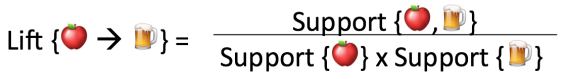


lift is symmetric in that the lift for “if A then B” is the same as the lift for “if B then A.”

The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

### Step 1 : Import / Load the required Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

### Step 2 : Import / Load the Dataset

In [2]:
Bread_Bskt = pd.read_csv("BreadBasket_MBA.csv")

In [3]:
Bread_Bskt.head()

,Date,Time,Transaction,Item
0,30-10-2016,09:58:11,1,Bread
1,30-10-2016,10:05:34,2,Scandinavian
2,30-10-2016,10:05:34,2,Scandinavian
3,30-10-2016,10:07:57,3,Hot chocolate
4,30-10-2016,10:07:57,3,Jam


In [22]:
Bread_Bskt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [5]:
Bread_Bskt['Item'].value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Juice                             369
Alfajores                         369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

### Let's find the 'Most' sold Bread items for Breakfast

In [6]:
Bread_Bskt['Item'].value_counts().iloc[:10]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

In [23]:
Bread_Bskt['Item'].value_counts().iloc[:10].index

Index(['Coffee', 'Bread', 'Tea', 'Cake', 'Pastry', 'NONE', 'Sandwich',
       'Medialuna', 'Hot chocolate', 'Cookies'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

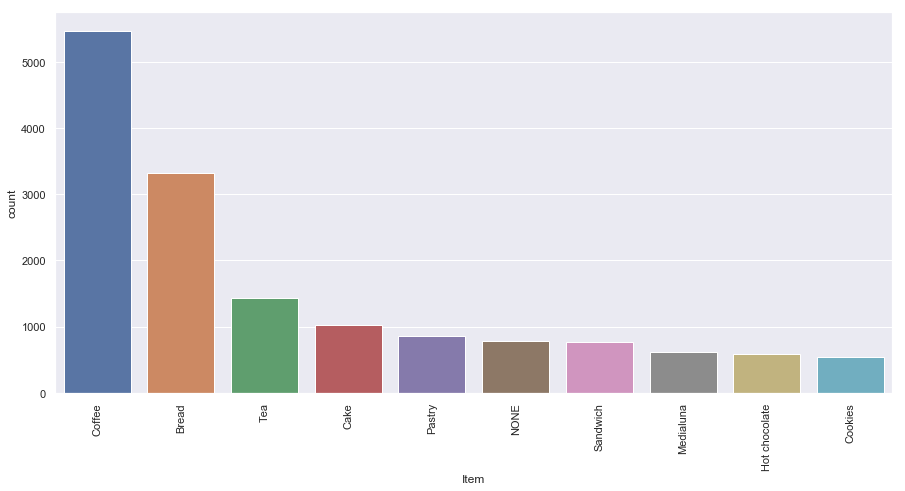

In [8]:
sns.set(rc={'figure.figsize':(15,7)})

sns.countplot(x = 'Item', 
              data = Bread_Bskt, 
              order = Bread_Bskt['Item'].value_counts().iloc[:10].index)


plt.xticks(rotation=90)

## Conclusion : Coffee is the most sought after item in Breakfast 

### Now , its time to get into Market Basket Analysis .......

We will be using MLxtend library’s Apriori Algorithm for extracting frequent item sets for further analysis. 

The apriori function expects data in a one-hot encoded pandas DataFrame in the following format:

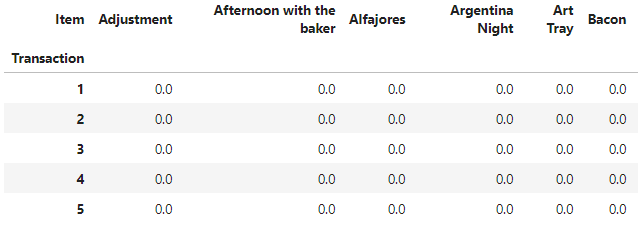

To achieve the above , we will execute the following steps -

a) We’ll group the bread_basket dataframe by 'Transaction'

b) display the count of items per transaction 

c) consolidate the items into 1 transaction per row with each product 1 hot encoded. 

In [24]:
Bread_Bskt_ReFrmtd = Bread_Bskt.groupby(['Transaction','Item']).size().reset_index(name='count')

In [25]:
Bread_Bskt_ReFrmtd.head()

,Transaction,Item,count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [26]:
Basket = Bread_Bskt_ReFrmtd.groupby(['Transaction', 'Item'])['count'].sum().unstack().reset_index().fillna(0).set_index('Transaction')

In [27]:
Basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
Bread_basket_sets = Basket.applymap(lambda x: 0 if x <= 0 else 1)

In [29]:
Bread_basket_sets.tail()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now , we will generate frequent item sets with a minimum support of at least 1% as this a more favourable support level that could show us more results.

In [30]:
frequent_itemsets = apriori(Bread_basket_sets, 
                            min_support=0.01, 
                            use_colnames=True)

In [31]:
frequent_itemsets

,support,itemsets
0,0.036093,(Alfajores)
1,0.015948,(Baguette)
2,0.324940,(Bread)
3,0.039765,(Brownie)
4,0.103137,(Cake)
5,0.012905,(Chicken Stew)
6,0.475081,(Coffee)
7,0.019305,(Coke)
8,0.054034,(Cookies)
9,0.038926,(Farm House)


In [32]:
frequent_itemsets = frequent_itemsets.sort_values(['support'], 
                              axis=0, 
                              ascending=False)

In [33]:
frequent_itemsets.head(20)

,support,itemsets
6,0.475081,(Coffee)
2,0.324940,(Bread)
27,0.141643,(Tea)
4,0.103137,(Cake)
35,0.089393,"(Coffee, Bread)"
20,0.085510,(Pastry)
19,0.079005,(NONE)
22,0.071346,(Sandwich)
16,0.061379,(Medialuna)
12,0.057916,(Hot chocolate)


In [34]:
A_Rules = association_rules(frequent_itemsets, metric="lift",min_threshold=1.5)

In [35]:
A_Rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146
1,(Tea),(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,0.008999,1.076235
2,(NONE),(Tea),0.079005,0.141643,0.018256,0.231076,1.631394,0.007066,1.116309
3,(Tea),(NONE),0.141643,0.079005,0.018256,0.128889,1.631394,0.007066,1.057264
4,(Hot chocolate),(Cake),0.057916,0.103137,0.011331,0.195652,1.897010,0.005358,1.115019


Association rules are normally written like this: {Diapers} -> {Beer} which means that there is a strong relationship between customers that purchased diapers and also purchased beer in the same transaction.

In the above example, the {Diaper} is the antecedent and the {Beer} is the consequent. Both antecedents and consequents can have multiple items. In other words, {Diaper, Gum} -> {Beer, Chips} is a valid rule.

<b><u>Leverage</b></u> computes the difference between the observed frequency of A and C appearing together and the frequency that would be expected if A and C were independent. An leverage value of 0 indicates independence.

A high <b><u>conviction</b></u> value means that the consequent is highly depending on the antecedent. For instance, in the case of a perfect confidence score, the denominator becomes 0 (due to 1 - 1) for which the conviction score is defined as 'inf'. Similar to lift, if items are independent, the conviction is 1.

In [36]:
A_Rules.sort_values('confidence', 
                    ascending = False, 
                    inplace = True)

In [37]:
A_Rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(NONE),(Tea),0.079005,0.141643,0.018256,0.231076,1.631394,0.007066,1.116309
0,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146
4,(Hot chocolate),(Cake),0.057916,0.103137,0.011331,0.195652,1.897010,0.005358,1.115019
1,(Tea),(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,0.008999,1.076235
3,(Tea),(NONE),0.141643,0.079005,0.018256,0.128889,1.631394,0.007066,1.057264
5,(Cake),(Hot chocolate),0.103137,0.057916,0.011331,0.109868,1.897010,0.005358,1.058364


## What is Product Recommendation

A product recommendation is basically a filtering system that seeks to predict and show the items that a user would like to purchase. It may not be entirely accurate, but if it shows you what you like then it is doing its job right.

Recommender systems have become increasingly popular in recent years, and are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. 

Mostly used in the digital domain, majority of today’s E-Commerce sites like eBay, Amazon, Alibaba etc make use of their proprietary recommendation algorithms in order to better serve the customers with the products they are bound to like.

Let’s consider an example to better understand the concept of a recommendation engine. 

If I am not wrong, almost all of you must have used Amazon for shopping. And just so you know, 35% of Amazon.com’s revenue is generated by its recommendation engine. 

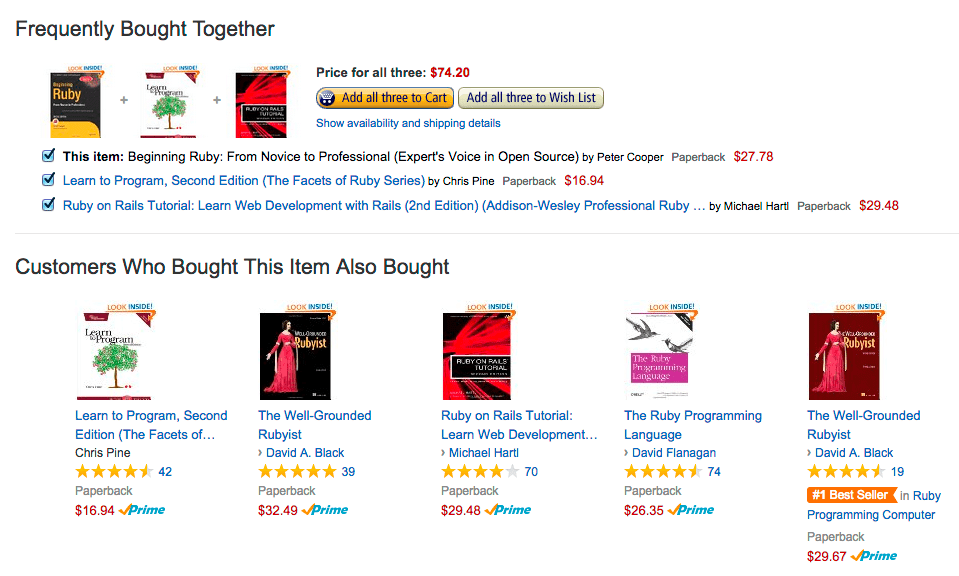

### What are the different types of recommendations?

There are basically three important types of recommendation engines:

    Collaborative filtering

    Content-Based Filtering

    Hybrid Recommendation Systems

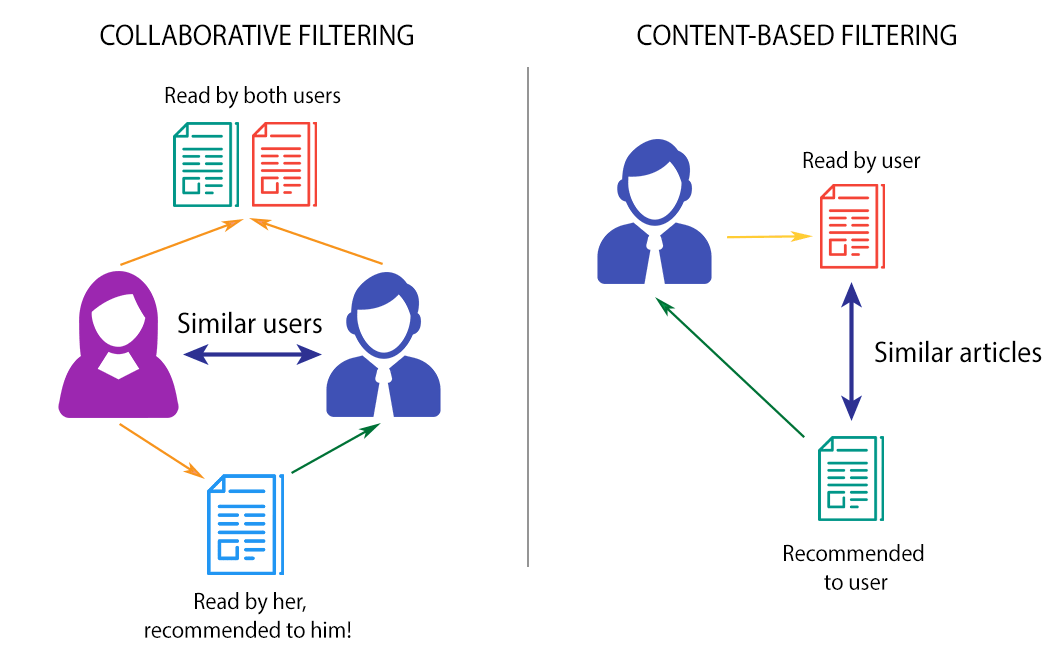

#### Collaborative filtering:

This filtering method is usually based on collecting and analyzing information on user’s behaviors, their activities or preferences and predicting what they will like based on the similarity with other users. 

A key advantage of the collaborative filtering approach is that it does not rely on machine analyzable content and thus it is capable of accurately recommending complex items such as movies without requiring an “understanding” of the item itself. 

Collaborative filtering is based on the assumption that people who agreed in the past will agree in the future, and that they will like similar kinds of items as they liked in the past. For example, if a person A likes item 1, 2, 3 and B like 2,3,4 then they have similar interests and A should like item 4 and B should like item 1.

### Content-based filtering:

These filtering methods are based on the description of an item and a profile of the user’s preferred choices. 

In a content-based recommendation system, keywords are used to describe the items; besides, a user profile is built to state the type of item this user likes. In other words, the algorithms try to recommend products which are similar to the ones that a user has liked in the past. 

The idea of content-based filtering is that if you like an item you will also like a ‘similar’ item. For example, when we are recommending the same kind of item like a movie or song recommendation. This approach has its roots in information retrieval and information filtering research.

Happy Learning !!

Thanks You !